<a href="https://colab.research.google.com/github/jrgreen7/SYSC4906/blob/master/Lecture_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel Density Estimation Notebook
    Based on https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py
          Written by: Jake Vanderplas <jakevdp@cs.washington.edu>
          Modified by: James Green, Nov 2019

Estimate pdf of SYSC4906_F19 midterm grades from raw scores using histogram and kernel density estimation.

       numCorrect
count   47.000000
mean    34.851064
std      6.324482
min     22.000000
25%     31.000000
50%     35.000000
75%     40.000000
max     47.000000


<Figure size 432x288 with 0 Axes>

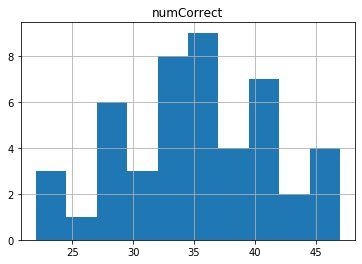

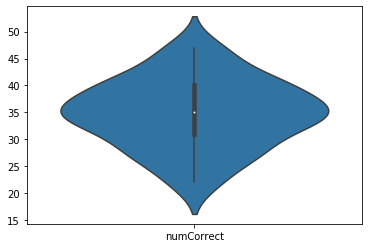

In [46]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
import pandas as pd
import seaborn as sb

# Load the midterm score data (CSV file) into a DataFrame using Pandas:
url = 'https://github.com/jrgreen7/SYSC4906/raw/master/MidtermGrades.csv'
midterm_data = pd.read_csv(url)

# Text description:
print(midterm_data.describe())

#Pandas built-in histogram
plt.figure();
midterm_data.hist();

#Pandas built-in violin plot
plt.figure();
sb.violinplot(data=midterm_data);

# Extract data out of dataframe and into nparray for use with kernel density estimation
X  = midterm_data.values;




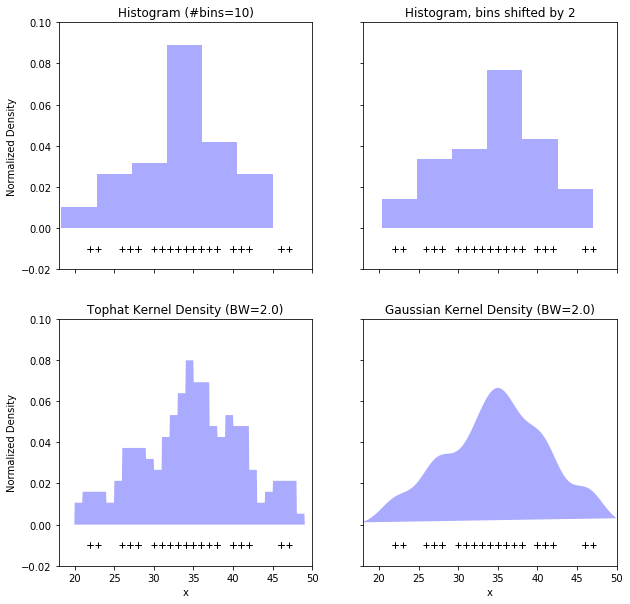

In [45]:
#----------------------------------------------------------------------
# Plot the progression of histograms to kernels

BW = 2
numBins = 10
X_plot = np.linspace(0, 50, 1000)[:, np.newaxis]
bins = np.linspace(5, 45, numBins)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc='#AAAAFF', density= True)
ax[0, 0].set_title("Histogram (#bins={0:d})".format(numBins))

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 2, fc='#AAAAFF', density= True)
ax[0, 1].set_title("Histogram, bins shifted by 2")

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=BW).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 0].set_title("Tophat Kernel Density (BW={0:.1f})".format(BW))

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=BW).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].set_title("Gaussian Kernel Density (BW={0:.1f})".format(BW))

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), '+k')
    axi.set_xlim(18, 50)
    axi.set_ylim(-0.02, 0.1)

for axi in ax[:, 0]:
    axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
    axi.set_xlabel('x')

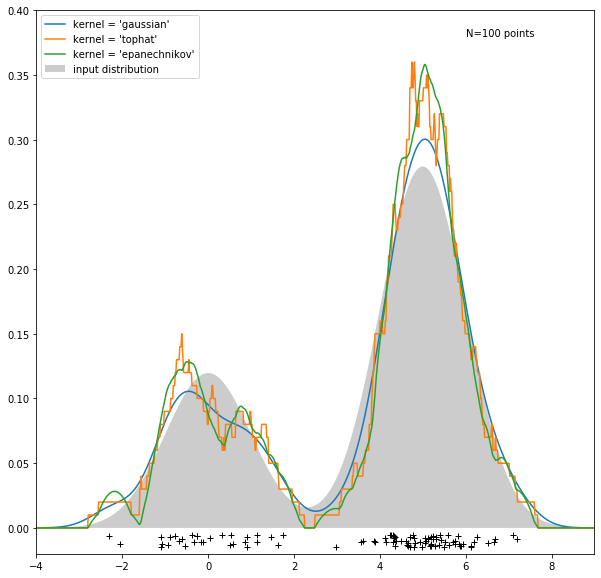

In [48]:
#----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots(figsize=(10,10))
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')

for kernel in ['gaussian', 'tophat', 'epanechnikov']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()